In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dddddddddd/download.jpg
/kaggle/input/coooooooo/360_F_187629015_Lob15tmtj9GSsoiNrJR0MH5sUZTfoK80.jpg
/kaggle/input/fffffffffffffff/images.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_2.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_7.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_5.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_10.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_1.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_8.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_3.JPG
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_6.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_9.jpg
/ka

# import Libraries

In [67]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import cv2

# Show image by using open cv
**open cv read image BGR so when we want to see it in normal way , we should convert color to RGB**

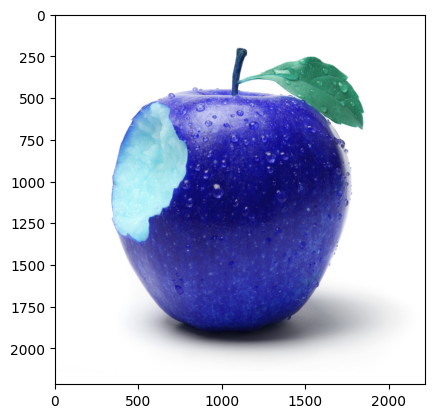

In [68]:
img1 = cv2.imread("/kaggle/input/fruit-and-vegetable-image-recognition/train/apple/Image_1.jpg")
plt.imshow(img1)

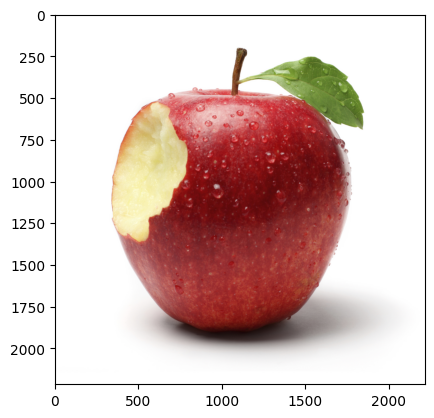

In [69]:
img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Reading Data

In [ ]:
img_width = 224 
img_height = 224

train_path = "/kaggle/input/fruit-and-vegetable-image-recognition/train"
val_path = "/kaggle/input/fruit-and-vegetable-image-recognition/validation"
test_path = "/kaggle/input/fruit-and-vegetable-image-recognition/test"



# Loading and Preparing Training Dataset from Directory

In [ ]:
data_train = tf.keras.utils.image_dataset_from_directory(
    train_path ,
    shuffle = True , 
    image_size = (img_height,img_width),
    batch_size = 32,
    validation_split = False)

Found 3115 files belonging to 36 classes.


In [72]:
category = data_train.class_names
print(category)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [73]:
len(category)

36

# Loading and Preparing Validation Dataset from Directory

In [ ]:
data_val = tf.keras.utils.image_dataset_from_directory(
    val_path ,
    shuffle = False , 
    image_size = (img_height,img_width),
    batch_size = 32,
    validation_split = False)

Found 351 files belonging to 36 classes.


# Loading and Testing Training Dataset from Directory

In [ ]:
data_test = tf.keras.utils.image_dataset_from_directory(
    test_path ,
    shuffle = False , #Note: No Shuffling for Test Data
    image_size = (img_height,img_width),
    batch_size = 32,
    validation_split = False)

Found 359 files belonging to 36 classes.


# View sample images

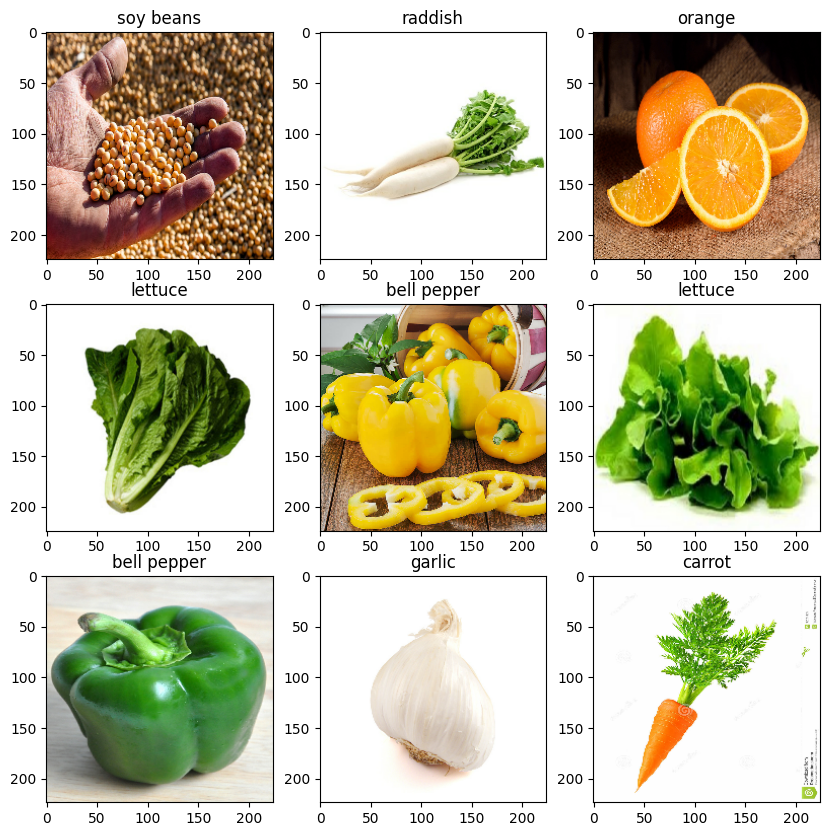

In [76]:
plt.figure(figsize=(10,10))
for image , label in data_train.take(2): # 2 means the sample is from seconed batch
    for i in range(9): #because size of figure limit to 10 : from 0 to 9
        plt.subplot(3,3,i+1),
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(category[label[i]])

# Building a CNN Model for Multi-Class Image Classification

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling

model = Sequential([
    
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),


    layers.Conv2D(512, (3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(1024, (3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),

    


    layers.Flatten(),
    layers.Dropout(0.2), 

    
    layers.Dense(512, activation="relu"),
    layers.Dense(36, activation="softmax")  
])


In [78]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [79]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 10, 10, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 3, 3, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 1, 1, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 36)             │        18,468 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,831,460 (26.06 MB)

 Trainable params: 6,831,460 (26.06 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
epochs = 40
History = model.fit ( data_train , validation_data =data_val , epochs = epochs)

Epoch 1/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 288ms/step - accuracy: 0.0352 - loss: 3.5529 - val_accuracy: 0.0912 - val_loss: 3.0143
Epoch 2/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 275ms/step - accuracy: 0.0816 - loss: 3.1372 - val_accuracy: 0.1339 - val_loss: 2.7266
Epoch 3/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 266ms/step - accuracy: 0.1242 - loss: 2.9259 - val_accuracy: 0.2108 - val_loss: 2.4820
Epoch 4/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 273ms/step - accuracy: 0.1539 - loss: 2.7327 - val_accuracy: 0.1909 - val_loss: 2.4980
Epoch 5/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 274ms/step - accuracy: 0.1689 - loss: 2.7095 - val_accuracy: 0.2536 - val_loss: 2.2776
Epoch 6/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 270ms/step - accuracy: 0.2192 - loss: 2.5344 - val_accuracy: 0.3533 - val_loss: 1.9461
Epoch 7/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 271ms/step - accuracy: 0.2778 - loss: 2.3032 - val_accuracy: 0.4558 - val_loss: 1.7498
Epoch 8/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 267ms/step - accuracy: 0.3190 - loss: 2.1575 - val_accu

# Visualizing Training and Validation Metrics

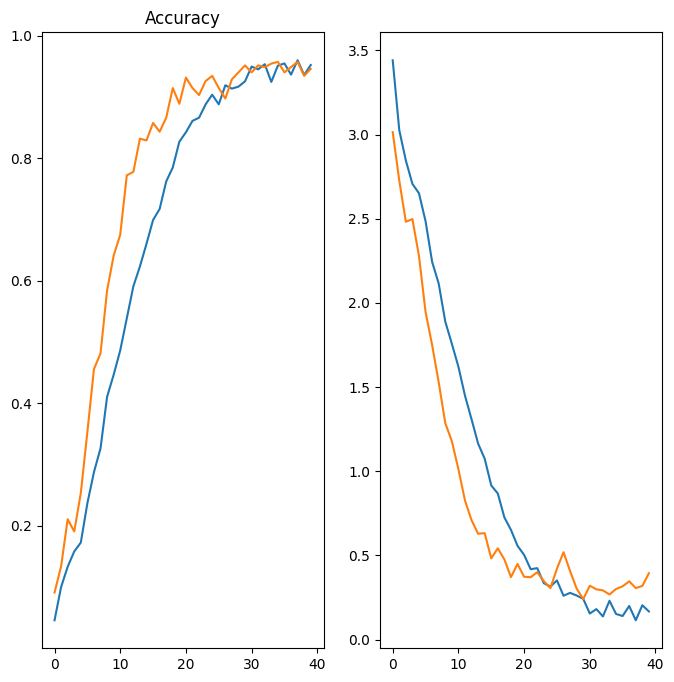

In [81]:
epochs_range = range(epochs)
plt.figure(figsize = (8,8))


plt.subplot(1,2,1)
plt.plot(epochs_range , History.history["accuracy"] , label = "Training Data")
plt.plot(epochs_range , History.history["val_accuracy"] , label = "Validation Data")
plt.title("Accuracy")


plt.subplot(1,2,2)
plt.plot(epochs_range , History.history["loss"] , label = "Training Data")
plt.plot(epochs_range , History.history["val_loss"] , label = "Validation Data")

# Preparing and Preprocessing a Single Image for Prediction

In [ ]:
image = "/kaggle/input/coooooooo/360_F_187629015_Lob15tmtj9GSsoiNrJR0MH5sUZTfoK80.jpg"
image = tf.keras.utils.load_img(image , target_size=(img_height,img_width))
image_arr = tf.keras.utils.array_to_img(image)
image_batch = tf.expand_dims(image_arr,0)

# Generating Prediction for a Single Image

In [83]:
pred = model.predict(image_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step


# Extracting Predicted Class and Confidence Score

In [84]:
predict_class = np.argmax(pred , axis=1)
score = np.max(pred)

# "Display Prediction Result with Image and Confidence Score"

the type of veg/fruit is corn and the accurecy = 0.9571133255958557


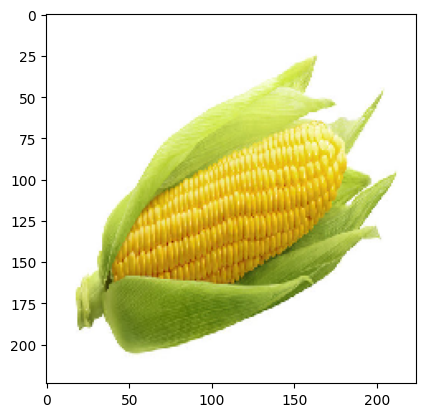

In [85]:
plt.imshow(image)
print(f"the type of veg/fruit is {category[predict_class[0]]} and the accurecy = {score}")

# Save the model

In [87]:
model.save("classify_Image3.keras")